In [47]:
import pandas as pd
import plotly.express as px
import textwrap
import numpy as np
from matplotlib import pyplot as plt

Read data and remove spaces

In [48]:
df = pd.read_csv("data.csv", delimiter=";", skipinitialspace=True, decimal=",", thousands=".")
df.columns= [x.strip() for x in df.columns]
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

Change pandas settings to print all rows in the data frame.

In [49]:
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_colwidth', None)

Original dataframe

In [50]:
display(df.sort_values(by='Paese').reset_index(drop = True))

,Paese,Area,Maschi,Femmine,Totale,%
0,Afghanistan,Asia centro meridionale,13432,3440,16872,"0,33%"
1,Albania,Europa centro orientale,213047,203782,416829,"8,11%"
2,Algeria,Africa settentrionale,11679,6416,18095,"0,35%"
3,Andorra,Altri paesi europei,5,5,10,"0,00%"
4,Angola,Africa centro meridionale,580,554,1134,"0,02%"
5,Antigua e Barbuda,America centro meridionale,9,7,16,"0,00%"
6,Apolidi,Apolidi,345,298,643,"0,01%"
7,Arabia Saudita,Asia occidentale,103,48,151,"0,00%"
8,Argentina,America centro meridionale,6777,7885,14662,"0,29%"
9,Armenia,Asia occidentale,654,858,1512,"0,03%"


In [51]:
df['Totale '] = pd.to_numeric(df['Totale'])

In [52]:
df_sorted_by_total = df.sort_values(by=['Totale'], ascending=False).reset_index(drop = True)
display(df_sorted_by_total)

,Paese,Area,Maschi,Femmine,Totale,%,Totale
0,Romania,Unione Europea,465632,616204,1081836,"21,04%",1081836
1,Albania,Europa centro orientale,213047,203782,416829,"8,11%",416829
2,Marocco,Africa settentrionale,224516,190572,415088,"8,07%",415088
3,Repubblica Popolare Cinese,Asia orientale,154993,152045,307038,"5,97%",307038
4,Ucraina,Europa centro orientale,57263,192350,249613,"4,86%",249613
5,Bangladesh,Asia centro meridionale,124275,49783,174058,"3,39%",174058
6,India,Asia centro meridionale,96741,70592,167333,"3,25%",167333
7,Filippine,Asia orientale,68580,90346,158926,"3,09%",158926
8,Egitto,Africa settentrionale,97932,49865,147797,"2,87%",147797
9,Pakistan,Asia centro meridionale,104754,39375,144129,"2,80%",144129


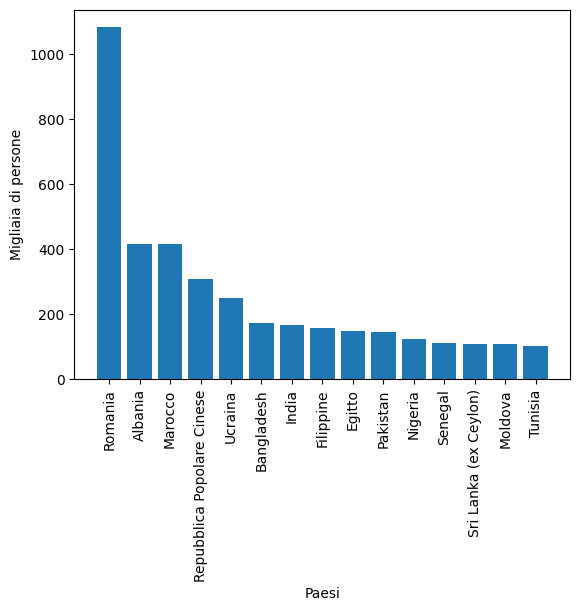

In [53]:
plt.bar(df_sorted_by_total.head(15)['Paese'], df_sorted_by_total.head(15)['Totale']/1000)
plt.xlabel("Paesi")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

<h3> Paesi per area geografica </h3>

In [54]:
df_areas = df[['Area', 'Paese']].groupby('Area').agg(lambda x: ' - '.join(x)).reset_index()
display(df_areas)

,Area,Paese
0,Africa centro meridionale,Camerun - Repubblica democratica del Congo (ex Zaire) - Repubblica del Congo - Angola - Sud Africa - Gabon - Ciad - Repubblica Centrafricana - Guinea Equatoriale - Namibia - São Tomé e Principe - Eswatini - Botswana - Lesotho
1,Africa occidentale,Nigeria - Senegal - Ghana - Costa d'Avorio - Gambia - Mali - Burkina Faso (ex Alto Volta) - Guinea - Togo - Capo Verde - Benin (ex Dahomey) - Guinea Bissau - Sierra Leone - Niger - Liberia - Mauritania
2,Africa orientale,Somalia - Etiopia - Eritrea - Mauritius - Kenya - Madagascar - Tanzania - Burundi - Uganda - Ruanda - Mozambico - Seychelles - Zambia - Zimbabwe (ex Rhodesia) - Malawi - Gibuti - Comore
3,Africa settentrionale,Marocco - Egitto - Tunisia - Algeria - Libia - Sudan - Sud Sudan
4,Altri paesi europei,Svizzera - San Marino - Norvegia - Islanda - Principato di Monaco - Liechtenstein - Città del Vaticano - Andorra
5,America centro meridionale,Perù - Ecuador - Brasile - Repubblica Dominicana - Cuba - El Salvador - Colombia - Argentina - Venezuela - Bolivia - Messico - Honduras - Cile - Paraguay - Uruguay - Dominica - Guatemala - Nicaragua - Costa Rica - Haiti - Panama - Giamaica - Trinidad e Tobago - Bahamas - Barbados - Guyana - Antigua e Barbuda - Belize - Saint Lucia - Saint Kitts e Nevis - Grenada - Suriname - Saint Vincent e Grenadine
6,America settentrionale,Stati Uniti d'America - Canada
7,Apolidi,Apolidi
8,Asia centro meridionale,Bangladesh - India - Pakistan - Sri Lanka (ex Ceylon) - Afghanistan - Kirghizistan - Kazakhstan - Nepal - Uzbekistan - Tagikistan - Turkmenistan - Bhutan - Maldive
9,Asia occidentale,Georgia - Repubblica Islamica dell'Iran - Iraq - Siria - Libano - Israele - Armenia - Giordania - Territori dell'Autonomia Palestinese - Azerbaigian - Yemen - Arabia Saudita - Kuwait - Qatar - Bahrein - Emirati Arabi Uniti - Oman


<h3> Totale di migranti per area geografica </h3>

In [55]:
percentual_lambda = {'%' : lambda x: 100*x['Totale']/x['Totale'].sum()} 
df_groupedby_area = df[['Area', 'Maschi', 'Femmine', 'Totale']].groupby('Area').sum().sort_values(by=['Totale'], ascending=False).assign(**percentual_lambda)
df_groupedby_area.loc['Totale'] = df_groupedby_area.sum(numeric_only=True)
display(df_groupedby_area)

,Maschi,Femmine,Totale,%
Area,,,,
Unione Europea,586728.0,834812.0,1421540.0,27.649207
Europa centro orientale,401213.0,584807.0,986020.0,19.178265
Africa settentrionale,402411.0,286672.0,689083.0,13.402787
Asia centro meridionale,399122.0,220549.0,619671.0,12.052712
Asia orientale,229412.0,260392.0,489804.0,9.526775
Africa occidentale,278304.0,122914.0,401218.0,7.803762
America centro meridionale,145621.0,224794.0,370415.0,7.204638
Asia occidentale,29247.0,42514.0,71761.0,1.395764
Africa orientale,18634.0,17199.0,35833.0,0.696958


In [56]:
df_groupedby_area = df_groupedby_area[:][:-1]

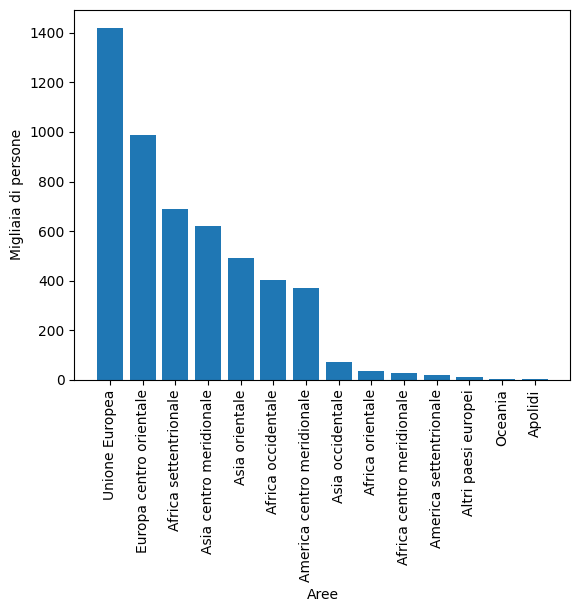

In [57]:
plt.bar(df_groupedby_area.index, df_groupedby_area['Totale']/1000)
plt.xlabel("Aree")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

<h3> Percentuale di migranti per area di origine. </h3>

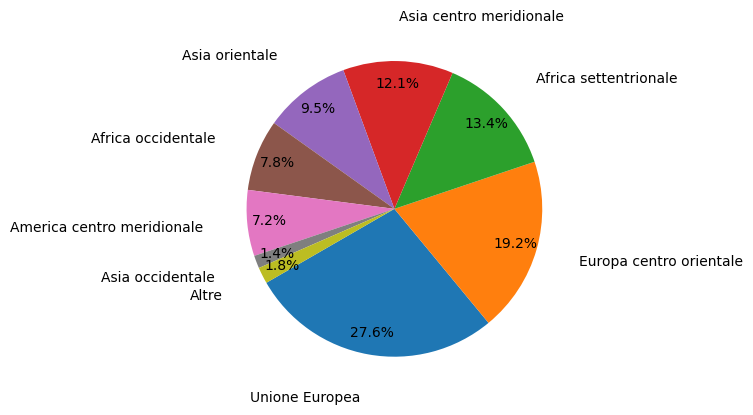

In [58]:
fig, ax = plt.subplots()
small_slices = df_groupedby_area[(df_groupedby_area['%'] <= 1.0)].groupby(df_groupedby_area['%'] <= 1.0).sum()
small_slices.index = ["Altre"]
df_groupedby_area_condensed = pd.concat([df_groupedby_area[(df_groupedby_area['%'] > 1.0)], small_slices])

ax.pie(df_groupedby_area_condensed['%'], labels=df_groupedby_area_condensed.index, autopct='%1.1f%%', labeldistance=1.3, startangle=210, pctdistance=0.85);

<h3> Percentuale di migranti (maschi) per area di origine</h3>

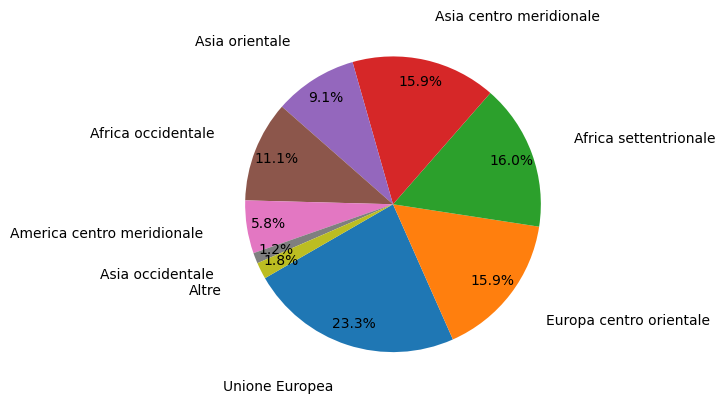

In [59]:
sum_men = df_groupedby_area['Maschi'].sum()
threshold = 0.01*sum_men
small_slices = df_groupedby_area[(df_groupedby_area['Maschi'] <= threshold)].groupby(df_groupedby_area['Maschi'] <= threshold).sum()
small_slices.index = ["Altre"]
df_groupedby_area_condensed = pd.concat([df_groupedby_area[(df_groupedby_area['Maschi'] > threshold)], small_slices])

fig, ax = plt.subplots()
_ = ax.pie(100*df_groupedby_area_condensed['Maschi']/sum_men, labels=df_groupedby_area_condensed.index, autopct='%1.1f%%', labeldistance=1.3, startangle=210, pctdistance=0.85)

<h3> Percentuale di migranti (femmine) per area di origine</h3>

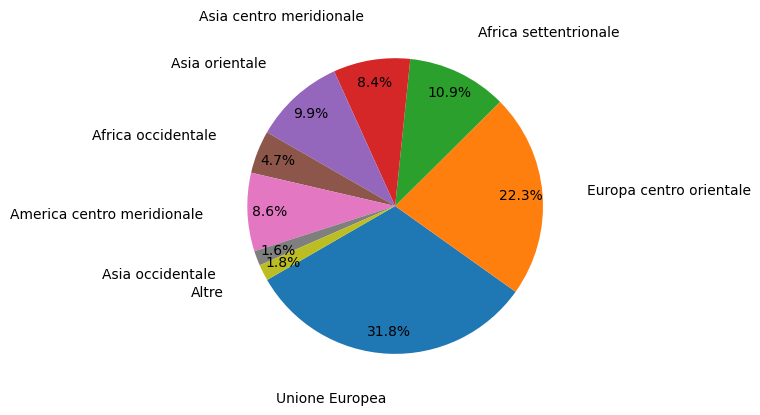

In [60]:
sum_women = df_groupedby_area['Femmine'].sum()
threshold = 0.01*sum_women
small_slices = df_groupedby_area[(df_groupedby_area['Femmine'] <= threshold)].groupby(df_groupedby_area['Femmine'] <= threshold).sum()
small_slices.index = ["Altre"]
df_groupedby_area_condensed = pd.concat([df_groupedby_area[(df_groupedby_area['Femmine'] > threshold)], small_slices])

fig, ax = plt.subplots()
_ = ax.pie(100*df_groupedby_area_condensed['Femmine']/sum_women, labels=df_groupedby_area_condensed.index,  autopct='%1.1f%%', labeldistance=1.3, startangle=210, pctdistance=0.85)

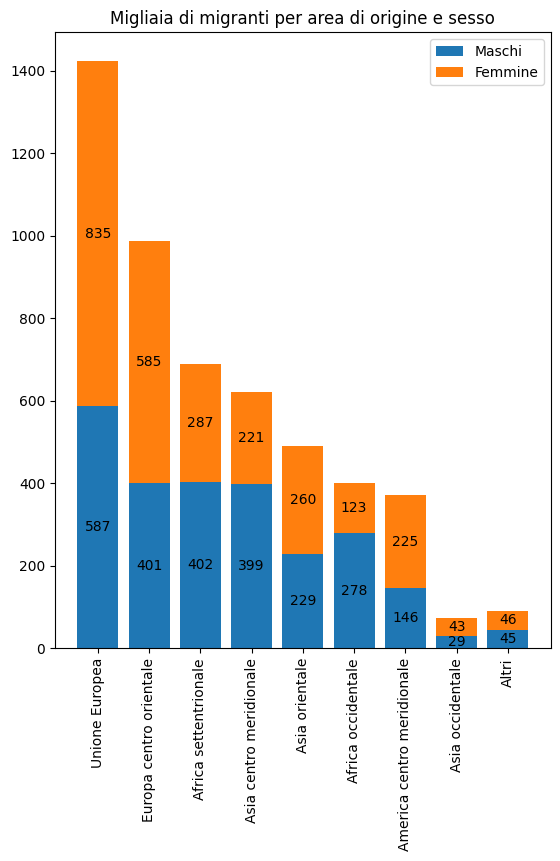

In [61]:
total = df_groupedby_area['Totale'].sum()
small_values = df_groupedby_area[df_groupedby_area['Totale'] <= 0.01*total].groupby(df_groupedby_area['Totale'] <= 0.01*total).sum()
small_values.index = ['Altri']

df_groupedby_area_condesed = pd.concat([df_groupedby_area[(df_groupedby_area['Totale'] > 0.01*total)], small_values])

weight_counts = {
    "Maschi": (df_groupedby_area_condesed['Maschi']/1_000).round(),
    "Femmine": (df_groupedby_area_condesed['Femmine']/1_000).round(),
}
width = 0.8

fig, ax = plt.subplots()
fig.set_figheight(8)
bottom = np.zeros(len(df_groupedby_area_condesed.index))

for boolean, weight_count in weight_counts.items():
    p = ax.bar(df_groupedby_area_condesed.index, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

for c in ax.containers:
    ax.bar_label(c, label_type='center')

ax.set_title("Migliaia di migranti per area di origine e sesso")
ax.legend(loc="upper right")

plt.xticks(rotation='vertical')

plt.show()

<h3> Paesi con più migranti maschi </h3>

In [62]:
df_sorted_by_number_of_men = df[['Paese', 'Area', 'Maschi']].sort_values(by=['Maschi'], ascending=False).reset_index(drop = True)
display(df_sorted_by_number_of_men)

,Paese,Area,Maschi
0,Romania,Unione Europea,465632
1,Marocco,Africa settentrionale,224516
2,Albania,Europa centro orientale,213047
3,Repubblica Popolare Cinese,Asia orientale,154993
4,Bangladesh,Asia centro meridionale,124275
5,Pakistan,Asia centro meridionale,104754
6,Egitto,Africa settentrionale,97932
7,India,Asia centro meridionale,96741
8,Senegal,Africa occidentale,82477
9,Nigeria,Africa occidentale,70616


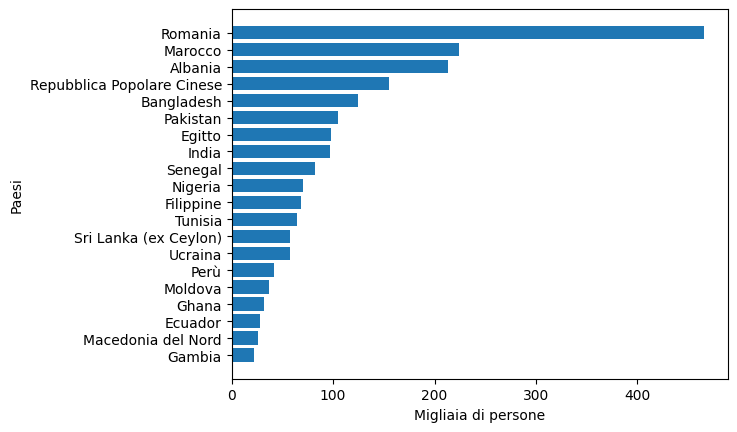

In [63]:
plt.barh(df_sorted_by_number_of_men.head(20)[::-1]['Paese'], df_sorted_by_number_of_men.head(20)[::-1]['Maschi']/1000)
plt.ylabel("Paesi")
plt.xlabel("Migliaia di persone")

plt.show()

<h3> Paese con più migrante femmine </h3>

In [64]:
df_sorted_by_number_of_women = df[['Paese', 'Area', 'Femmine']].sort_values(by=['Femmine'], ascending=False).reset_index(drop = True)
display(df_sorted_by_number_of_women)

,Paese,Area,Femmine
0,Romania,Unione Europea,616204
1,Albania,Europa centro orientale,203782
2,Ucraina,Europa centro orientale,192350
3,Marocco,Africa settentrionale,190572
4,Repubblica Popolare Cinese,Asia orientale,152045
5,Filippine,Asia orientale,90346
6,Moldova,Europa centro orientale,73026
7,India,Asia centro meridionale,70592
8,Perù,America centro meridionale,57123
9,Polonia,Unione Europea,55631


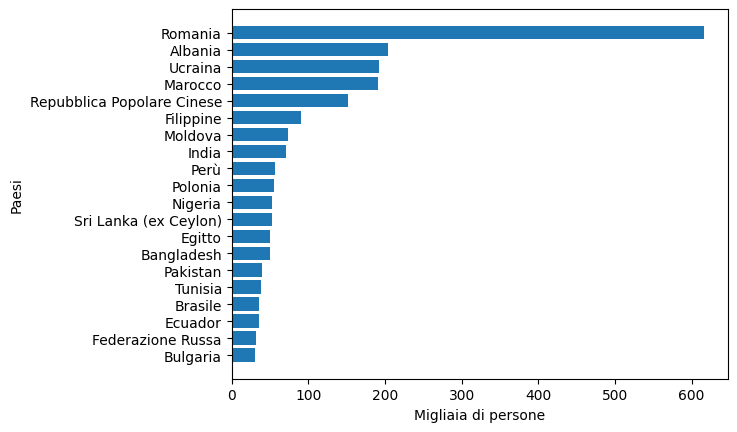

In [65]:
plt.barh(df_sorted_by_number_of_women.head(20)[::-1]['Paese'], df_sorted_by_number_of_women.head(20)[::-1]['Femmine']/1000)
plt.ylabel("Paesi")
plt.xlabel("Migliaia di persone")

plt.show()

Include nuove colonne alla tabella.
* Maschi - Femmine
* % Sopra la media : La differenza tra maschi e femmine sopra la metà del totale di migranti (indicato in valori percentuali)
* Proporzione Maschio/Femmina

In [66]:
assignments = {'Maschi - Femmine': lambda x: x['Maschi'] - x['Femmine'], \
               '% sopra la media': lambda x: 200*(x['Maschi'] - x['Femmine'])/x['Totale'], \
               'Proporzione Maschio/Femmina': lambda x: x['Maschi']/x['Femmine']}
df_diff_maschi_femmine = df.assign(**assignments)
df_diff_maschi_femmine = df_diff_maschi_femmine.sort_values(by=['Maschi - Femmine'], ascending=False).reset_index()
display(df_diff_maschi_femmine[['Paese', 'Maschi', 'Femmine', 'Maschi - Femmine', '% sopra la media', 'Proporzione Maschio/Femmina']])

,Paese,Maschi,Femmine,Maschi - Femmine,% sopra la media,Proporzione Maschio/Femmina
0,Bangladesh,124275,49783,74492,85.594457,2.496334
1,Pakistan,104754,39375,65379,90.722894,2.660419
2,Senegal,82477,30121,52356,92.996323,2.738189
3,Egitto,97932,49865,48067,65.044622,1.963943
4,Marocco,224516,190572,33944,16.355086,1.178116
5,India,96741,70592,26149,31.253847,1.370424
6,Tunisia,64226,38196,26030,50.828923,1.681485
7,Gambia,21627,1010,20617,182.153112,21.412871
8,Mali,19898,1134,18764,178.432864,17.546737
9,Nigeria,70616,53030,17586,28.445724,1.331624


<h3> Paesi con i più grandi eccessi assoluti di migranti maschi </h3>

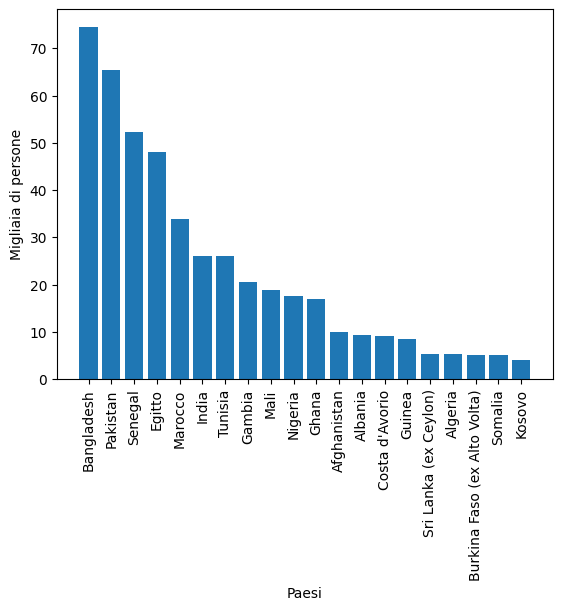

In [67]:
most_men_absolute = df_diff_maschi_femmine.head(20)
plt.bar(df_diff_maschi_femmine.loc[most_men_absolute.index]['Paese'], df_diff_maschi_femmine.loc[most_men_absolute.index]['Maschi - Femmine']/1000)
plt.xlabel("Paesi")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

<h3> Paesi con i più grandi eccessi assoluti di migrante femmine </h3>

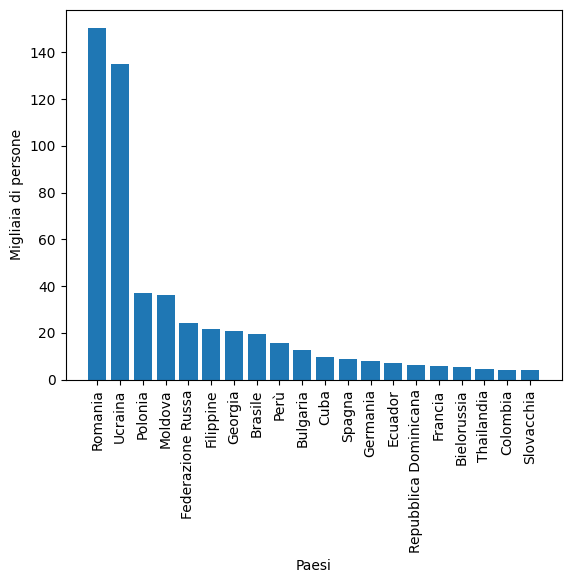

In [68]:
most_women_absolute = df_diff_maschi_femmine.tail(20).loc[::-1]
plt.bar(df_diff_maschi_femmine.loc[most_women_absolute.index]['Paese'], -1*df_diff_maschi_femmine.loc[most_women_absolute.index]['Maschi - Femmine']/1000)
plt.xlabel("Paesi")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

<h3> Paesi con i più grandi eccessi di migranti maschi per % sopra la media. </h3>
Non sono stati inclusi paesi senza migranti maschi o senza migranti femmine.

In [69]:
df_diff_maschi_femmine = df_diff_maschi_femmine.sort_values(by=['% sopra la media'], ascending=False)
display(df_diff_maschi_femmine[(df_diff_maschi_femmine['Maschi'] > 0) & (df_diff_maschi_femmine['Femmine'] > 0)] \
        [['Paese', 'Maschi', 'Femmine', 'Maschi - Femmine', '% sopra la media', 'Proporzione Maschio/Femmina']].reset_index(drop = True))

,Paese,Maschi,Femmine,Maschi - Femmine,% sopra la media,Proporzione Maschio/Femmina
0,Gambia,21627,1010,20617,182.153112,21.412871
1,Mali,19898,1134,18764,178.432864,17.546737
2,Maldive,14,1,13,173.333333,14.000000
3,Guinea Bissau,2112,236,1876,159.795571,8.949153
4,Qatar,35,4,31,158.974359,8.750000
5,Guinea,10170,1710,8460,142.424242,5.947368
6,Ciad,359,85,274,123.423423,4.223529
7,Liberia,882,213,669,122.191781,4.140845
8,Afghanistan,13432,3440,9992,118.444761,3.904651
9,Niger,1299,341,958,116.829268,3.809384


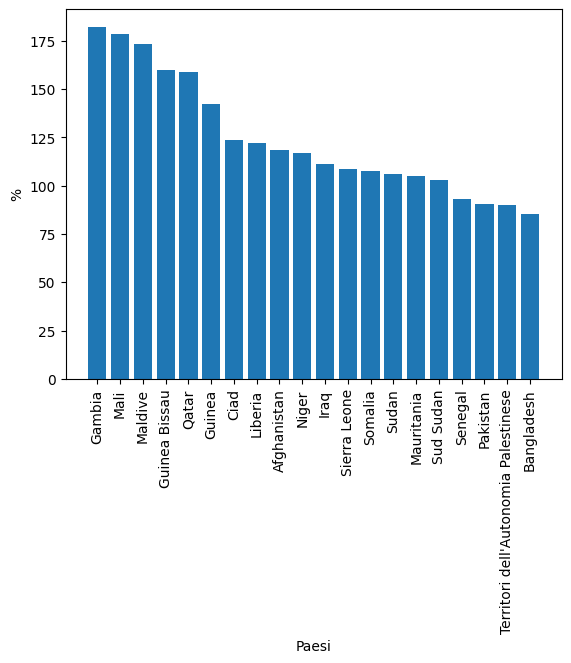

In [70]:
most_men_proportional = df_diff_maschi_femmine[(df_diff_maschi_femmine['Maschi'] > 0) & (df_diff_maschi_femmine['Femmine'] > 0)].head(20)['Paese']
plt.bar(most_men_proportional, df_diff_maschi_femmine.loc[most_men_proportional.index]['% sopra la media'])

plt.xlabel("Paesi")
plt.ylabel("%")

plt.xticks(rotation='vertical')
plt.show()

<h3> Paesi con i più grandi eccessi di migrante femmine per % sopra la media. </h3>
Non sono stati inclusi paesi senza migranti maschi o senza migranti femmine.

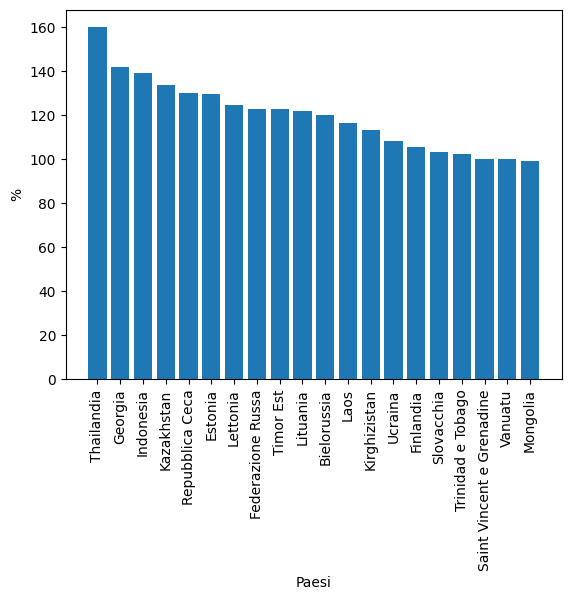

In [71]:
most_women_proportional = df_diff_maschi_femmine[(df_diff_maschi_femmine['Maschi'] > 0) & (df_diff_maschi_femmine['Femmine'] > 0)].tail(20)['Paese']

plt.bar(most_women_proportional.loc[::-1], -1*df_diff_maschi_femmine.loc[most_women_proportional.index].loc[::-1]['% sopra la media'])
plt.xlabel("Paesi")
plt.ylabel("%")

plt.xticks(rotation='vertical')
plt.show()

<h3> Paesi con popolazioni di migranti più desuguale (rapporto uomo/donne) </h3>

In [72]:
df_country_most_unequals = pd.DataFrame({"Eccesso assoluto di maschi" : most_men_absolute['Paese'].values, "Eccesso assoluto di femmine": most_women_absolute['Paese'].values, "Eccesso proporzionale di maschi": most_men_proportional.values, "Eccesso proporzionale di femmine": most_women_proportional.values})
display(df_country_most_unequals)

,Eccesso assoluto di maschi,Eccesso assoluto di femmine,Eccesso proporzionale di maschi,Eccesso proporzionale di femmine
0,Bangladesh,Romania,Gambia,Mongolia
1,Pakistan,Ucraina,Mali,Vanuatu
2,Senegal,Polonia,Maldive,Saint Vincent e Grenadine
3,Egitto,Moldova,Guinea Bissau,Trinidad e Tobago
4,Marocco,Federazione Russa,Qatar,Slovacchia
5,India,Filippine,Guinea,Finlandia
6,Tunisia,Georgia,Ciad,Ucraina
7,Gambia,Brasile,Liberia,Kirghizistan
8,Mali,Perù,Afghanistan,Laos
9,Nigeria,Bulgaria,Niger,Bielorussia


Legge i codici ISO dei paesi e fa il merge con il data frame originale

In [73]:
df_codes = pd.read_csv("codes.csv", delimiter=";")
df_codes = df_codes.map(lambda x: x.strip() if isinstance(x, str) else x)
df_join_code = df_codes.join(df.set_index("Paese"), on="Paese")
df_join_code["% Maschi"] = 100*df_join_code["Maschi"]/df_join_code["Totale"]

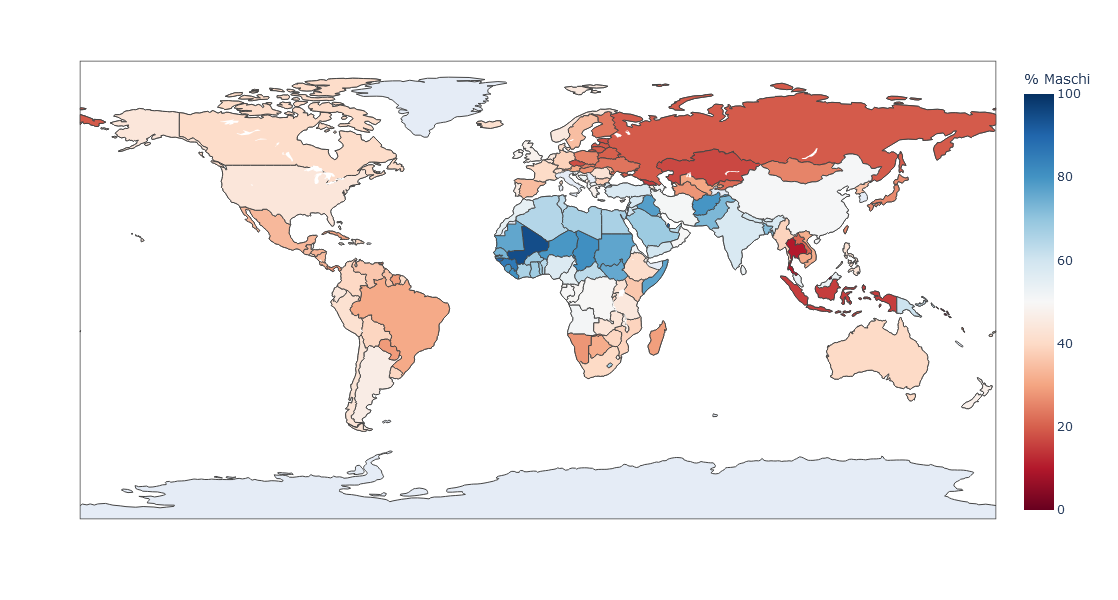

In [74]:
fig = px.choropleth(df_join_code, locations=df_join_code["Code"],
                    color="% Maschi", # lifeExp is a column of gapminder
                    hover_name="Paese", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.RdBu)
fig.update_layout(showlegend=True)

fig.update_layout(height=600,
                  width=900)

fig.show()